In [2]:
import numpy as np
from numpy.linalg import norm
import pickle
import matplotlib.pyplot as plt
import copy
import math
import time
import scipy
from pathlib import Path
import scipy.io
import seaborn as sns

%matplotlib inline

# PEG

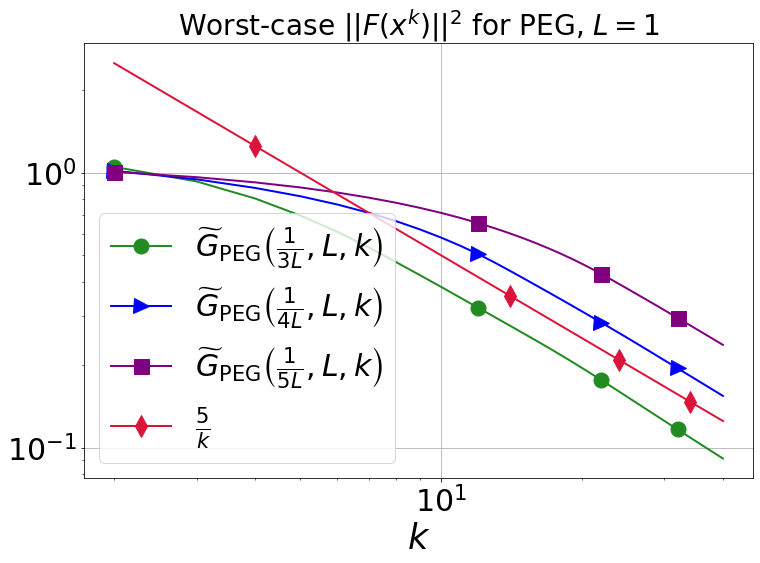

In [51]:
L = 1.0
gamma_1 = 1.0/(3*L)
gamma_2 = 1.0/(4*L)
gamma_3 = 1.0/(5*L)
N_max = 40

worst_case_sq_norm_gamma_1 = np.array([])
worst_case_sq_norm_gamma_2 = np.array([])
worst_case_sq_norm_gamma_3 = np.array([])
guessed_upper_bound = np.array([])

gamma_1_str = '%.6f' % gamma_1
gamma_2_str = '%.6f' % gamma_2
gamma_3_str = '%.6f' % gamma_3

for N in range(N_max-1):
    res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_1_str+'.mat')
    worst_case_sq_norm_gamma_1 = np.append(worst_case_sq_norm_gamma_1, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_2_str+'.mat')
    worst_case_sq_norm_gamma_2 = np.append(worst_case_sq_norm_gamma_2, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_3_str+'.mat')
    worst_case_sq_norm_gamma_3 = np.append(worst_case_sq_norm_gamma_3, res['res_norm'][0][0])
    guessed_upper_bound = np.append(guessed_upper_bound, 5.0/(N+2))
    
x_array = np.array(range(N_max-1))+2
    
# add result for N = 45    
# res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(45)+'__'+gamma_1_str+'.mat')
# worst_case_sq_norm_gamma_1 = np.append(worst_case_sq_norm_gamma_1, res['res_norm'][0][0])
# res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(45)+'__'+gamma_2_str+'.mat')
# worst_case_sq_norm_gamma_2 = np.append(worst_case_sq_norm_gamma_2, res['res_norm'][0][0])
# guessed_upper_bound = np.append(guessed_upper_bound, 5.0/(45))
# x_array = np.append(x_array, 45)
# # add result for N = 50    
# res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(50)+'__'+gamma_1_str+'.mat')
# worst_case_sq_norm_gamma_1 = np.append(worst_case_sq_norm_gamma_1, res['res_norm'][0][0])
# res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(50)+'__'+gamma_2_str+'.mat')
# worst_case_sq_norm_gamma_2 = np.append(worst_case_sq_norm_gamma_2, res['res_norm'][0][0])
# guessed_upper_bound = np.append(guessed_upper_bound, 5.0/(50))
# x_array = np.append(x_array, 50)
    
fig = plt.figure(figsize=(12,8))
plt.title(r"Worst-case $||F(x^k)||^2$ for PEG, $L = 1$", fontsize=28)

plt.semilogy(x_array, worst_case_sq_norm_gamma_1, linewidth=2,
             markersize = 15, marker = "o",
             markevery=range(0, N_max-1, 10), color="forestgreen",
             label=r'$\widetilde{G}_{\mathrm{PEG}}\left(\frac{1}{3L}, L, k\right)$')
plt.semilogy(x_array, worst_case_sq_norm_gamma_2, linewidth=2,
             markersize = 15, marker = ">",
             markevery=range(0, N_max-1, 10), color="blue",
             label=r'$\widetilde{G}_{\mathrm{PEG}}\left(\frac{1}{4L}, L, k\right)$')
plt.semilogy(x_array, worst_case_sq_norm_gamma_3, linewidth=2,
             markersize = 15, marker = "s",
             markevery=range(0, N_max-1, 10), color="purple",
             label=r'$\widetilde{G}_{\mathrm{PEG}}\left(\frac{1}{5L}, L, k\right)$')
plt.semilogy(x_array, guessed_upper_bound, linewidth=2, 
             markersize = 15, marker = "d",
             markevery=range(2, N_max-1, 10), color="crimson",
             label=r'$\frac{5}{k}$')


plt.legend(loc='best', fontsize=30)
plt.xlabel(r"$k$", fontsize=35)
# plt.ylabel(r"$||F(x^k)||^2$", fontsize=30)

plt.xticks(fontsize=30)
_ = plt.yticks(fontsize=30)

plt.grid()

ax = fig.gca()
ax.xaxis.offsetText.set_fontsize(28)
ax.yaxis.offsetText.set_fontsize(28)

ax.set_xscale('log')

plt.savefig("plot/PEG_OG_norm_L_"+str(L)+'_N_'+str(N_max)+".pdf", bbox_inches='tight')

# OG

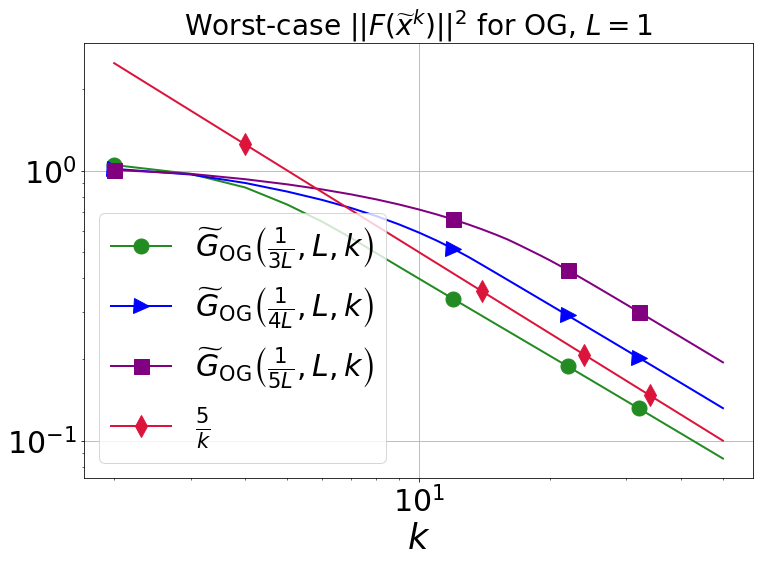

In [50]:
L = 1.0
gamma_1 = 1.0/(3*L)
gamma_2 = 1.0/(4*L)
gamma_3 = 1.0/(5*L)
N_max = 40

worst_case_sq_norm_gamma_1 = np.array([])
worst_case_sq_norm_gamma_2 = np.array([])
worst_case_sq_norm_gamma_3 = np.array([])
guessed_upper_bound = np.array([])

gamma_1_str = '%.6f' % gamma_1
gamma_2_str = '%.6f' % gamma_2
gamma_3_str = '%.6f' % gamma_3

for N in range(N_max-1):
    res = scipy.io.loadmat('dump/OG_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_1_str+'.mat')
    worst_case_sq_norm_gamma_1 = np.append(worst_case_sq_norm_gamma_1, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/OG_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_2_str+'.mat')
    worst_case_sq_norm_gamma_2 = np.append(worst_case_sq_norm_gamma_2, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/OG_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_3_str+'.mat')
    worst_case_sq_norm_gamma_3 = np.append(worst_case_sq_norm_gamma_3, res['res_norm'][0][0])
    guessed_upper_bound = np.append(guessed_upper_bound, 5.0/(N+2))
    
x_array = np.array(range(N_max-1))+2
    
# add result for N = 45    
res = scipy.io.loadmat('dump/OG_norm_L_'+str(int(L))+'_N_'+str(45)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1 = np.append(worst_case_sq_norm_gamma_1, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_norm_L_'+str(int(L))+'_N_'+str(45)+'__'+gamma_2_str+'.mat')
worst_case_sq_norm_gamma_2 = np.append(worst_case_sq_norm_gamma_2, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_norm_L_'+str(int(L))+'_N_'+str(45)+'__'+gamma_3_str+'.mat')
worst_case_sq_norm_gamma_3 = np.append(worst_case_sq_norm_gamma_3, res['res_norm'][0][0])
guessed_upper_bound = np.append(guessed_upper_bound, 5.0/(45))
x_array = np.append(x_array, 45)
# # add result for N = 50    
res = scipy.io.loadmat('dump/OG_norm_L_'+str(int(L))+'_N_'+str(50)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1 = np.append(worst_case_sq_norm_gamma_1, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_norm_L_'+str(int(L))+'_N_'+str(50)+'__'+gamma_2_str+'.mat')
worst_case_sq_norm_gamma_2 = np.append(worst_case_sq_norm_gamma_2, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_norm_L_'+str(int(L))+'_N_'+str(50)+'__'+gamma_3_str+'.mat')
worst_case_sq_norm_gamma_3 = np.append(worst_case_sq_norm_gamma_3, res['res_norm'][0][0])
guessed_upper_bound = np.append(guessed_upper_bound, 5.0/(50))
x_array = np.append(x_array, 50)
    
fig = plt.figure(figsize=(12,8))
plt.title(r"Worst-case $||F(\widetilde{x}^k)||^2$ for OG, $L = 1$", fontsize=28)

plt.semilogy(x_array, worst_case_sq_norm_gamma_1, linewidth=2,
             markersize = 15, marker = "o",
             markevery=range(0, N_max-1, 10), color="forestgreen",
             label=r'$\widetilde{G}_{\mathrm{OG}}\left(\frac{1}{3L}, L, k\right)$')
plt.semilogy(x_array, worst_case_sq_norm_gamma_2, linewidth=2,
             markersize = 15, marker = ">",
             markevery=range(0, N_max-1, 10), color="blue",
             label=r'$\widetilde{G}_{\mathrm{OG}}\left(\frac{1}{4L}, L, k\right)$')
plt.semilogy(x_array, worst_case_sq_norm_gamma_3, linewidth=2,
             markersize = 15, marker = "s",
             markevery=range(0, N_max-1, 10), color="purple",
             label=r'$\widetilde{G}_{\mathrm{OG}}\left(\frac{1}{5L}, L, k\right)$')
plt.semilogy(x_array, guessed_upper_bound, linewidth=2, 
             markersize = 15, marker = "d",
             markevery=range(2, N_max-1, 10), color="crimson",
             label=r'$\frac{5}{k}$')


plt.legend(loc='best', fontsize=30)
plt.xlabel(r"$k$", fontsize=35)
# plt.ylabel(r"$||F(x^k)||^2$", fontsize=30)

plt.xticks(fontsize=30)
_ = plt.yticks(fontsize=30)

plt.grid()

ax = fig.gca()
ax.xaxis.offsetText.set_fontsize(28)
ax.yaxis.offsetText.set_fontsize(28)

ax.set_xscale('log')

plt.savefig("plot/OG_norm_L_"+str(L)+'_N_'+str(N_max)+".pdf", bbox_inches='tight')